# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import cv2
from sklearn.model_selection import train_test_split

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

1


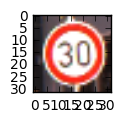

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

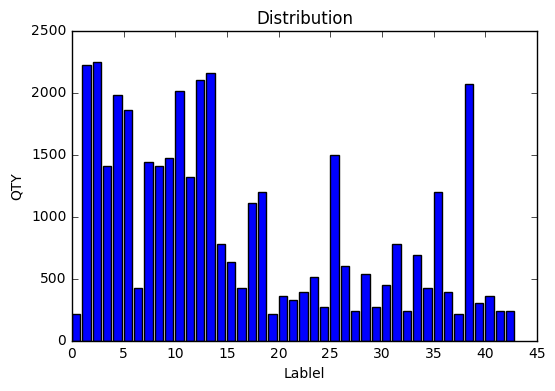

In [4]:
#Plot image distribution

def imageDist(labels):
    values, counts = np.unique(labels, return_counts=True)
    plt.figure()
    plt.bar(values, counts)
    plt.ylabel("QTY")
    plt.xlabel("Lablel")
    plt.title("Distribution")
    
imageDist(y_train)
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
#Split into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
print("Number of validation examples =", len(X_validation))

#Shuffle data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


Number of validation examples = 7842


In [6]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 20
BATCH_SIZE = 128

def LeNet(x):
    #Hyperparameters
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6. Shape dimesnions = (height, width, input depth, output depth)
    conv1_W = tf.Variable(tf.truncated_normal(shape = (5,5,3,6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1,1,1,1], padding = 'VALID') + conv1_b
    
    #Activation: ReLU
    conv1 = tf.nn.relu(conv1)
    
    #Pooling: Input = 28x28x6, Output = 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    #Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape = (5,5,6,16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides = [1,1,1,1], padding = 'VALID') + conv2_b
    
    #Activation
    conv2 = tf.nn.relu(conv2)
    
    #Pooling: Input = 10x10x16. Output = 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    #Flatten: Input = 5x5x16, Output = 400
    fc0 = flatten(conv2)
    
    #Layer 3: Fully Connected. Input = 400, Output = 120
    fc1_W = tf.Variable(tf.truncated_normal(shape = (400,120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    #Activation
    fc1 = tf.nn.relu(fc1)
    
    #Layer 4: Fully Connected. Input = 120, Output = 84
    fc2_W = tf.Variable(tf.truncated_normal(shape = (120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    #Activation
    fc2 = tf.nn.relu(fc2)
    
    #Layer 5: Fully Connected. Input = 84, Output = 43
    fc3_W = tf.Variable(tf.truncated_normal(shape = (84,43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
    
    

In [7]:
#Placeholders for batches of images and labels
x = tf.placeholder(tf.float32, (None, 32,32,3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y,43)

In [8]:
#Training Pipeline
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

In [9]:
#Model Evaluation Pipeline
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
#Train model
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training I hope...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, '/home/matthew/Documents/Udacity/SDC/Term 1/Traffic Sign Classifier/CarND-Traffic-Sign-Classifier-Project-master/model')
    print('Model Saved!')

Training I hope...

EPOCH 1 ...
Validation Accuracy = 0.778

EPOCH 2 ...
Validation Accuracy = 0.864

EPOCH 3 ...
Validation Accuracy = 0.925

EPOCH 4 ...
Validation Accuracy = 0.934

EPOCH 5 ...
Validation Accuracy = 0.932

EPOCH 6 ...
Validation Accuracy = 0.952

EPOCH 7 ...
Validation Accuracy = 0.946

EPOCH 8 ...
Validation Accuracy = 0.950

EPOCH 9 ...
Validation Accuracy = 0.959

EPOCH 10 ...
Validation Accuracy = 0.946

EPOCH 11 ...
Validation Accuracy = 0.952

EPOCH 12 ...
Validation Accuracy = 0.957

EPOCH 13 ...
Validation Accuracy = 0.947

EPOCH 14 ...
Validation Accuracy = 0.961

EPOCH 15 ...
Validation Accuracy = 0.955

EPOCH 16 ...
Validation Accuracy = 0.958

EPOCH 17 ...
Validation Accuracy = 0.964

EPOCH 18 ...
Validation Accuracy = 0.958

EPOCH 19 ...
Validation Accuracy = 0.968

EPOCH 20 ...
Validation Accuracy = 0.970

Model Saved!


In [11]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('/home/matthew/Documents/Udacity/SDC/Term 1/Traffic Sign Classifier/CarND-Traffic-Sign-Classifier-Project-master/model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    test_accuracy = evaluate(X_test, y_test)
    print('Test Accuracy = {:.3f}'.format(test_accuracy))

Test Accuracy = 0.899


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 
I experimented with a few different preprocessing techniques such as normalizing, colorspace transformations, however I found that I was getting decent results without these changes. What is left above in the preprocessing section is the splitting of the training data into a training set and a validation set, as well as data shuffling.

As I progressed through this problem and read more about machine learning I began to understand the importance of preprocessing data, and how it might help imporve the network. Perhaps if the data was preprocessed properly, it would improve my results with the "new images" section.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I split the data into training and vaidation sets using the train_test_split function. The validation set is 20% of the data. 

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._

**Answer:**
My model architecture looks like this:
* Convnet layer with 32x32x3 input and 14x14x6 output: Relu activation
* Convnet layer with 14x14x6 input and 5x5x16 output: Relu activation
* Fully connected layer with input of 400 and output of 120: Relu activation
* Fully connected layer with input of 120 and output of 84: Relu activation
* Fully connected layer with input of 84 and output of 43: Relu activation

For this project I adapted the LeNet architecture that we learned about in lessons to classify traffic signs rather than the mnist dataset. The model takes a set of 32x32x3 images and classifies them into one of 43 different signs. Relu activation, being the most popular activation method in deep learning today, was the obvious choice for its simplicity good results.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

**Answer:**
The adam optimizer is used in order to have a controlled learning rate. I like the advantages that the adap optimizer offers as compared to the standard gradient decent optimizer such as momentum. Batch size and epochs were varied and determined thru expirimentation. I would love to explore more with the hyperparameters, but I hit a time limit with the system I am currently using. Unfortunately I do not have access to GPU processing right now.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I chose to implement the LeNet architecture as reccomended in the project lesson. I found the LeNet architecture to be a good introduction to deep learning for a new machine learning student. It is fairly straight forward, it was discussed in the lessons, and it was producing results immeadiatly. I explored with hyperparameters and preprocessing to find the best solution. In future iterations I would like to implement dropout and regularization.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


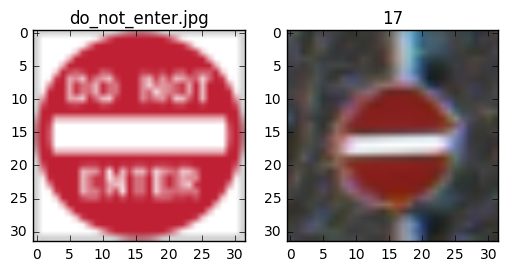

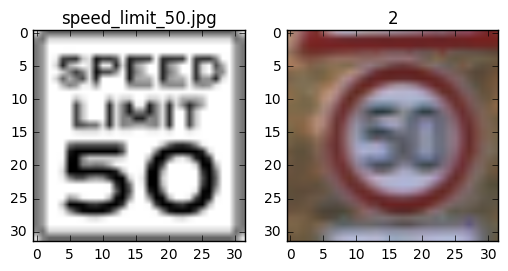

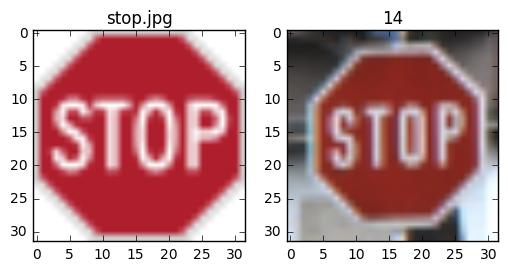

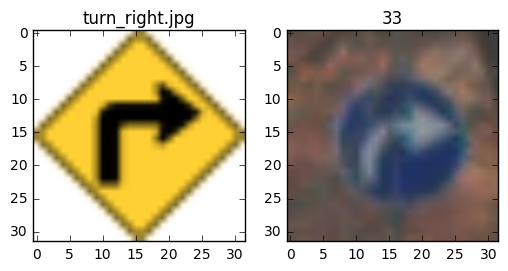

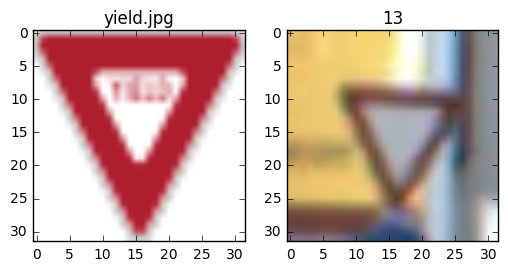

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import numpy as np

def getImage(filePath):
    image = plt.imread(filePath)
    image = cv2.resize(image, (32, 32), interpolation = cv2.INTER_AREA)
    print(image.shape)
    return image

imgFolder = 'new_images/'

imgNames = []
imgNames.append('do_not_enter.jpg')
imgNames.append('speed_limit_50.jpg')
imgNames.append('stop.jpg')
imgNames.append('turn_right.jpg')
imgNames.append('yield.jpg')

imgValues = {}
imgValues['do_not_enter.jpg']   = 17   
imgValues['speed_limit_50.jpg'] = 2   
imgValues['stop.jpg']           = 14   
imgValues['turn_right.jpg']     = 33  
imgValues['yield.jpg']          = 13

extraImgs = np.zeros([len(imgNames),32,32,3], dtype=np.uint8)
extraLabels = []

for index, name in enumerate(imgNames):
    extraImgs[index] = getImage(imgFolder + name)
    fig = plt.figure()
    a=fig.add_subplot(1,2,1)
    a.set_title(name)
    plt.imshow(extraImgs[index])
    
    imgVal = imgValues[name]
    extraLabels.append(imgVal)
    training_index = next(index for index, val in enumerate(y_train) if val==imgVal)
    a=fig.add_subplot(1,2,2)
    a.set_title(str(imgVal))
    plt.imshow(X_train[training_index])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
While the images I gathered (United States traffic signs) are similar to the training set, there are some small differences that might make them difficult to classify. For example, the "turn right" signs have similar arrow shapes, but different overall sign shapes. One large difference is the "speed limit" sign. They both have a 50, but everything else about the sign is different. The US sign has text, and is rectangular whereas the training set sign has no text but the 50 and is round.

In [16]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

val = tf.argmax(logits,1)
val_softmax = tf.nn.softmax(logits)
topFive = tf.nn.top_k(val_softmax, k=5)

with tf.Session() as sess:
    saver.restore(sess, '/home/matthew/Documents/Udacity/SDC/Term 1/Traffic Sign Classifier/CarND-Traffic-Sign-Classifier-Project-master/model')
    print('model loaded')
    
    sol_vals, sol_topFive = sess.run([val, topFive], feed_dict = {x: extraImgs})
print('Classifications:', sol_vals)
print('True Classes:    [17, 2, 14, 33, 13]')

topFiveValues = sol_topFive.values
topFiveIndices = sol_topFive.indices

print('Top Five:', topFiveIndices)


model loaded
Classifications: [17 13  2 14 13]
True Classes:    [17, 2, 14, 33, 13]
Top Five: [[17 14  0  1  2]
 [13  9 26 11 17]
 [ 2  1  3  4  9]
 [14  1 36  0  4]
 [13  1  0  2  3]]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._



**Answer:**

The model performed.....ok. It got 2/5 images correct, so only 40% accurate. This is as compared to a good validation accuracy of ~.95 but decent testing data accuracy. I am excited to research more about different networks that have tackled the traffic sign classification problem and to experiment with different architectures. I am disappointed in the overall results, but at the same time I'd say not bad for the first classifier I have ever constructed! 

[[17 14  0  1  2]
 [13  9 26 11 17]
 [ 2  1  3  4  9]
 [14  1 36  0  4]
 [13  1  0  2  3]]


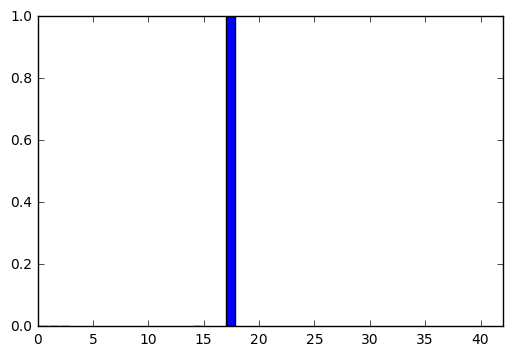

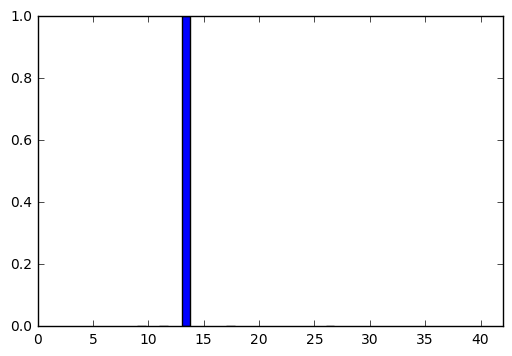

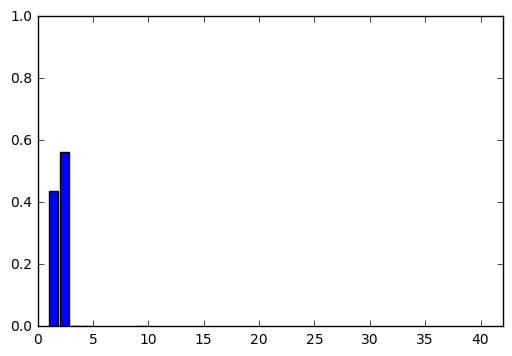

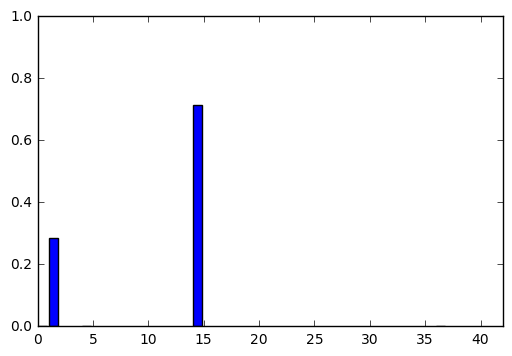

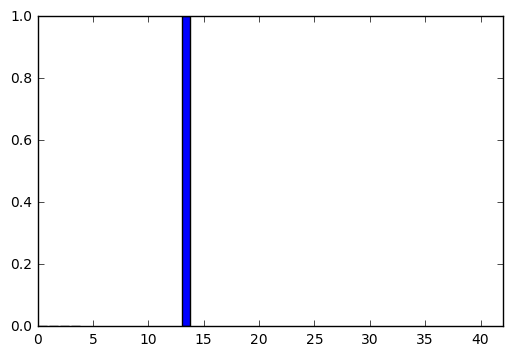

In [17]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

topFive_values = sol_topFive.values
topFive_indices = sol_topFive.indices

print(topFive_indices)

for index, vals_array in enumerate(topFive_values):
    y = vals_array
    x = topFive_indices[index][:]
    fig = plt.figure()    
    plt.bar(x, y, color="blue")
    plt.axis([0, 42, 0, 1])
    #fig.set_title(name)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The model is certain for the first 2 images and the last images, but less certain for images 3 and 4. Interestingly, it only predicted the first and last images correctly. Of the 3 incorrect predictions, only 1 of the images had the correct calssification in the top 5. I suppose this is reasonable because in some cases the traffic sign images I gathered are quite unlike the german traffic signs.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.